<a href="https://colab.research.google.com/github/Rokuske/Data/blob/main/Clasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import random as rd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
#Подключаемся к гугл диску
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_quality = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML Studies/Лабораторные/ИИ/3ЛБ/data_quality.txt', delimiter=',')

In [ ]:
data_clustering = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML Studies/Лабораторные/ИИ/3ЛБ/data_clustering.txt', delimiter=',')

In [ ]:
data_quality

In [ ]:
data_clustering[0:3]

array([[2.08, 1.05],
       [2.05, 7.7 ],
       [4.53, 5.49]])

# 1 Кластеризация K-средних

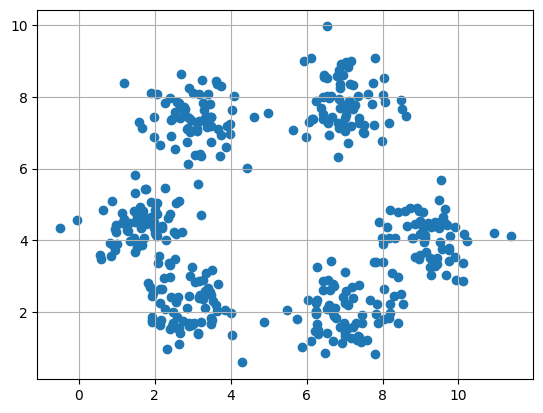

In [ ]:
x_axis1 = data_quality[:, 0]
y_axis1 = data_quality[:, 1]
# Построение
plt.scatter(x_axis1, y_axis1)
plt.grid()
plt.show()

In [ ]:
x_axis = data_clustering[:, 0]
y_axis = data_clustering[:, 1]

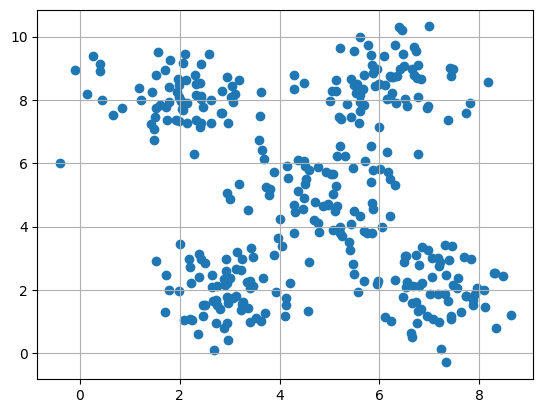

In [ ]:
# Построение
plt.scatter(x_axis, y_axis)
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

## 1.1 Теория алгоритма KMeans


Алгоритм KMeans - это один из наиболее популярных методов кластеризации в машинном обучении. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.
Алгоритм KMeans состоит из следующих шагов:
Инициализация центроидов. Начальные центроиды выбираются случайным образом из множества точек данных.
Распределение точек по кластерам. Каждая точка данных относится к ближайшему центроиду.
Пересчет центроидов. Для каждого кластера вычисляется новый центр масс, который является средним значением всех точек в кластере.
Повторение шагов 2 и 3 до тех пор, пока на какой-то итерации не происходит изменения кластеров.

n_clusters Количество кластеров


Центроида - это центр масс кластера в методе KMeans. Он представляет собой точку в пространстве признаков, которая является средним значением всех точек в кластере. Центроид вычисляется на каждой итерации алгоритма путем нахождения среднего значения всех точек в кластере. Центроид используется для определения принадлежности точек к кластерам на следующей итерации алгоритма. Центроиды являются ключевыми элементами в методе KMeans, так как они определяют расположение кластеров в пространстве признаков. Каждый кластер имеет свой центроид, который может быть использован для оценки сходства между кластерами и для визуализации результатов кластеризации

Центроиды в методе KMeans выбираются на первой итерации случайным образом из набора данных. Количество центроидов соответствует заданному количеству кластеров. На следующих итерациях центроиды пересчитываются как среднее значение всех точек в кластере. Таким образом, центроиды являются центрами масс кластеров и используются для определения принадлежности точек к кластерам на следующей итерации алгоритма.

Выбор кластеров в методе KMeans осуществляется на каждой итерации алгоритма путем определения ближайшего центроида для каждой точки данных. Точки, которые находятся ближе к одному центроиду, относятся к одному кластеру. Каждый кластер представляет собой группу точек, которые находятся близко друг к другу в пространстве признаков. Центроиды пересчитываются на каждой итерации алгоритма путем нахождения среднего значения всех точек в кластере. Этот процесс продолжается до тех пор, пока изменения между предыдущим и текущим разбиениями на кластеры станут незначительными.

init: метод инициализации центроидов кластеров. По умолчанию используется метод "k-means++", который выбирает начальные центроиды таким образом, чтобы они были максимально удалены друг от друга.


"init random" в методе KMeans означает, что начальные центроиды кластеров будут выбраны случайным образом из набора данных. Это означает, что алгоритм будет выбирать случайные точки в качестве начальных центроидов кластеров.

n_init: количество различных начальных наборов центроидов, которые будут использоваться для поиска лучшего разбиения на кластеры. По умолчанию равно 10.

Параметр n_init в методе KMeans определяет количество различных начальных наборов центроидов, которые будут использоваться для поиска лучшего разбиения на кластеры. По умолчанию n_init равно 10, что означает, что алгоритм будет запущен 10 раз с различными начальными наборами центроидов. Каждый запуск алгоритма будет использовать разные начальные центроиды, выбранные случайным образом из набора данных. Затем будет выбрано лучшее разбиение на кластеры на основе критерия инерции или внутри-кластерной суммы квадратов. Критерий инерции является мерой того, насколько точки внутри каждого кластера близки друг к другу, а точки между кластерами далеки друг от друга. Чем меньше значение критерия инерции, тем лучше разбиение на кластеры. Использование нескольких начальных наборов центроидов позволяет уменьшить вероятность попадания в локальный минимум и повысить качество разбиения на кластеры

max_iter: максимальное количество итераций, которое будет выполнено для каждого начального набора центроидов. По умолчанию равно 300.

tol: пороговое значение для изменения инерции кластеров, при котором алгоритм останавливается. По умолчанию равно 1e-4.

Критерий инерции в методе KMeans является мерой того, насколько точки внутри каждого кластера близки друг к другу, а точки между кластерами далеки друг от друга. Он определяется как сумма квадратов расстояний между каждой точкой и центроидом ее кластера.

algorithm: алгоритм, используемый для вычисления кластеров. По умолчанию используется алгоритм "auto", который выбирает наилучший алгоритм на основе размера данных.


full: алгоритм полного перебора. Он вычисляет расстояния между каждой точкой и каждым центроидом, что может быть очень медленным для больших наборов данных.



elkan: алгоритм Elkan. Он использует оптимизации для ускорения вычислений и может быть быстрее, чем алгоритм полного перебора.




Параметр algorithm по умолчанию равен "auto", что означает, что алгоритм будет выбран автоматически на основе размера данных. Если размер данных меньше 50 000 точек и количество кластеров меньше или равно 10, то будет использован алгоритм Elkan. В противном случае будет использован алгоритм полного перебора.

verbose: уровень подробности вывода. По умолчанию равен 0, что означает отсутствие вывода.

Параметр verbose в методе KMeans определяет, как много информации будет выводиться в процессе выполнения алгоритма. Если verbose равен 0, то никакой информации не будет выводиться. Если verbose равен 1, то будет выводиться информация о текущем состоянии алгоритма на каждой итерации. Если verbose равен 2, то будет выводиться дополнительная информация, такая как время выполнения каждой итерации и количество точек, которые были перераспределены между кластерами.

Параметр precompute_distances в методе KMeans определяет, нужно ли предварительно вычислять расстояния между точками и центроидами. Если precompute_distances равно "auto", то это будет сделано автоматически в зависимости от размера данных. Если precompute_distances равно True, то расстояния будут предварительно вычислены и сохранены в памяти, что может ускорить выполнение алгоритма для больших наборов данных. Если precompute_distances равно False, то расстояния будут вычисляться на каждой итерации алгоритма.
Использование параметра precompute_distances может быть полезно для ускорения выполнения алгоритма, особенно для больших наборов данных. Однако, если вы работаете с очень большими наборами данных, то предварительное вычисление расстояний может занять много времени и занимать много памяти. В этом случае, может быть лучше вычислять расстояния на каждой итерации алгоритма.

copy_x: определяет, нужно ли копировать данные перед их обработкой. По умолчанию равно True.

## 1.2 Реализиция


In [ ]:
data_clustering.shape

(350, 2)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init=80)
kmeans.fit(data_clustering)

KMeans(n_clusters=5, n_init=80, random_state=0)

In [ ]:
labels = kmeans.labels_
labels.shape

(350,)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[6.10842857, 8.58428571],
       [4.92605634, 5.0184507 ],
       [1.98385714, 8.04942857],
       [2.97253521, 1.97267606],
       [7.09588235, 2.01735294]])

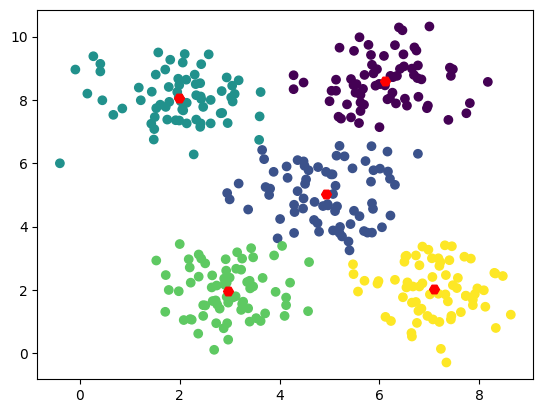

In [ ]:
plt.scatter(data_clustering[:, 0], data_clustering[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='H', s=50, c='r')
plt.show()

# 2 Кластеризация MeanShift

## 2.1 Теоретическая часть


https://translated.turbopages.org/proxy_u/en-ru.ru.56d0b6ab-65337cd5-602e8236-74722d776562/https/www.geeksforgeeks.org/ml-mean-shift-clustering/

Выбирается начальная точка
Создается окно окресность bandwidth
Ко всем точкам которые попали в окно строятся вектора
Затем вычисляется средний вектор всех этих векторов
И затем по этому вектору смещается центр и после от этого центра аналогичная операция проводится

 Суть метода заключается в том,
что задается функция оценки плотности
распределения точек в пространстве признаков.
Далее для этих точек строится градиент ядра
оценки плотности распределения и вычисляется
вектор среднего сдвига, задаваемый как вектор
наибольшего увеличения градиента.
Пусть имеется 𝑑 размерное пространство
признаков 𝑅, возьмем 𝑛 точек в этом пространстве
𝑥1, 𝑥2, … , 𝑥𝑛 . Для этих точек зададим оценку
плотности распределения признаков методом
Парзеновских окон:

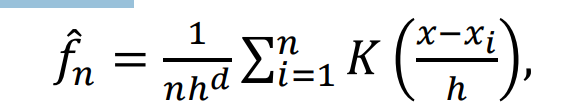

де ℎ – размер окна, 𝐾(𝑥) – функция ядра. Она
должна удовлетворять следующим правилам:
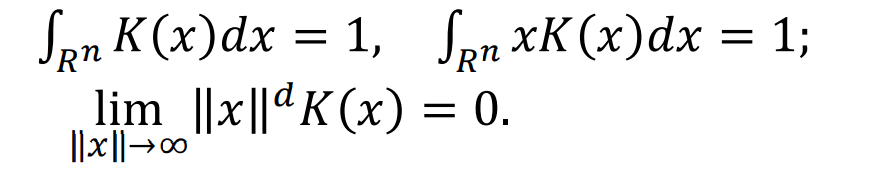

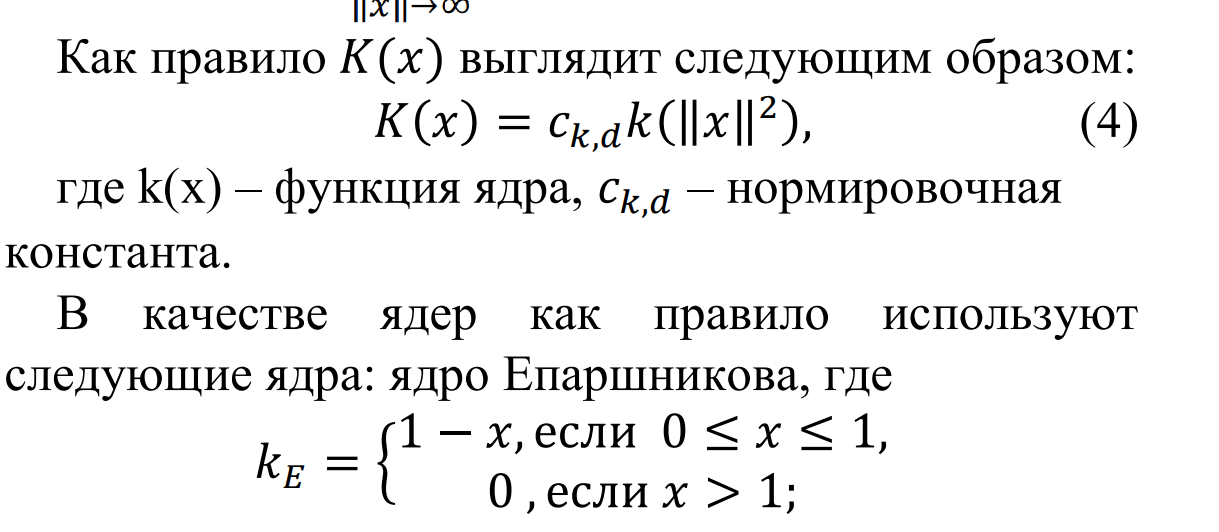

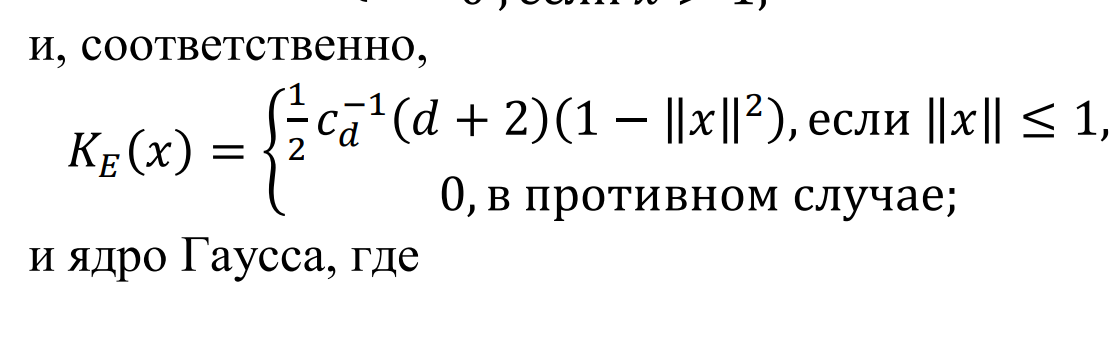

Формула (4) показывает, что сдвиг среднего,
вычисленный с ядром 𝑔(𝑥) , пропорционален
оценке нормализованной производной
эмпирической плотности вероятности,
оцениваемой с помощью ядра 𝑘(𝑥). Поэтому сдвиг
среднего всегда направлен по максимуму
возрастания эмпирической плотности вероятности.
Последнее обстоятельство гарантирует
сходимость этой оценки в точку с нулевой
производной. Области с малыми значениями
плотности вероятностей не представляют интереса,
поэтому сдвиг среднего в таких областях большой.
Возле локальных максимумов сдвиг малый и
анализ более подробный. Из этого следует, что
метод сдвига среднего – это метод адаптивного
спуска по градиенту

Математическая составляющая алгоритма MeanShift основана на понятии ядерного сглаживания. Каждая точка данных взвешивается в соответствии с ее расстоянием от других точек данных. Алгоритм определяет местоположение максимума плотности вероятности в пространстве признаков. Для этого выполняются следующие шаги:
Инициализация начальных точек (seeds) для каждой точки данных в наборе данных.
Для каждой начальной точки вычисляется плотность вероятности в окрестности этой точки.
Вычисляется среднее значение всех точек данных, которые находятся внутри окна сглаживания (bandwidth) вокруг начальной точки.
Начальная точка перемещается в направлении максимального увеличения плотности вероятности, которое определяется как разность между текущей плотностью вероятности и плотностью вероятности в новой точке, которая была вычислена на предыдущем шаге.
Шаги 2-4 повторяются до тех пор, пока все начальные точки не сойдутся к одному максимуму плотности вероятности.
Кластеры формируются путем объединения точек данных, которые сходятся к одному максимуму плотности вероятности.

Алгоритм MeanShift использует следующие математические операции:
Ядерное сглаживание (kernel smoothing): метод оценки плотности вероятности, который использует ядерную функцию для взвешивания точек данных в зависимости от их расстояния от других точек данных.
Плотность вероятности (probability density): вероятность того, что случайная величина примет определенное значение.


Вычисление вектора среднего сдвига: используется для оценки градиента функции плотности и определения направления максимального увеличения плотности вероятности.

Ядро Епанечникова (Epanechnikov kernel): используется в качестве ядра для оценки плотности вероятности и вычисления вектора среднего сдвига.
Оценка градиента функции плотности: используется для определения направления максимального увеличения плотности вероятности и перемещения начальной точки в этом направлении.

Окно сглаживания (bandwidth): параметр, который определяет размер окна, используемого для оценки плотности вероятности. Он определяет, насколько далеко точки могут перемещаться в каждой итерации.

Начальные точки (seeds): точки данных, которые используются для начала процесса кластеризации.


bandwidth: параметр, который определяет размер окна, используемого для оценки плотности вероятности. Он определяет, насколько далеко точки могут перемещаться в каждой итерации. Значение bandwidth должно быть выбрано таким образом, чтобы оно соответствовало размеру кластеров в данных

Окно сглаживания (bandwidth) - это параметр, который определяет размер окна, используемого для оценки плотности вероятности в алгоритме MeanShift. Оно определяет, насколько далеко точки могут перемещаться в каждой итерации. Значение bandwidth должно быть выбрано таким образом, чтобы оно соответствовало размеру кластеров в данных.
Значение bandwidth может быть выбрано с помощью различных методов, таких как правило серебряной линии (silverman's rule) или правило скользящего окна (window sliding rule). Однако, выбор оптимального значения bandwidth может быть сложной задачей и может потребовать экспериментов с различными значениями.
В алгоритме MeanShift используется ядерное сглаживание (kernel smoothing), которое использует ядерную функцию для взвешивания точек данных в зависимости от их расстояния от других точек данных. Ядро Епанечникова (Epanechnikov kernel) используется в качестве ядра для оценки плотности вероятности и вычисления вектора среднего сдвига.
Значение bandwidth может быть установлено вручную или оценено с помощью предоставленной функции estimate_bandwidth в библиотеке scikit-learn. Однако, необходимо учитывать, что выбор оптимального значения bandwidth зависит от размера кластеров в данных и может потребовать экспериментов с различными значениями.

seeds: начальные точки, которые используются для начала процесса кластеризации. Если seeds не указан, то MeanShift выбирает начальные точки автоматически

Seeds (начальные точки) - это точки данных, которые используются для начала процесса кластеризации в алгоритме MeanShift. Каждая начальная точка представляет собой центр окна сглаживания (bandwidth), в котором вычисляется плотность вероятности. Начальные точки могут быть выбраны случайным образом или с использованием других методов, таких как k-means.

bin_seeding: параметр, который определяет, следует ли использовать биннинг для выбора начальных точек. Если bin_seeding=True, то начальные точки выбираются из бинов, которые содержат большое количество точек данных.

cluster_all: параметр, который определяет, следует ли помещать все точки данных в кластеры. Если cluster_all=True, то все точки данных будут отнесены к какому-либо кластеру, даже если они находятся далеко от всех кластеров.

min_bin_freq: параметр, который определяет минимальное количество точек данных, которые должны находиться в бине, чтобы он был выбран в качестве начальной точки. Если min_bin_freq=1, то все бины будут использоваться в качестве начальных точек.

cluster_tol: параметр, который определяет, насколько близко должны находиться точки данных, чтобы они были отнесены к одному кластеру. Если cluster_tol=0, то точки данных будут отнесены к одному кластеру, только если они совпадают

max_iter: параметр, который определяет максимальное количество итераций, которые должны быть выполнены в процессе кластеризации. Если max_iter=None, то кластеризация будет продолжаться до тех пор, пока не будет достигнуто условие остановки.

cluster_estimator: параметр, который определяет, какой алгоритм кластеризации будет использоваться для финальной кластеризации. Если cluster_estimator=None, то будет использоваться MeanShift.
outlier_label: параметр, который определяет метку, которая будет присвоена выбросам. Если outlier_label=None, то выбросы не будут помечены.

## 2.2 Практическая часть


In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
clustering = MeanShift(bandwidth=1, max_iter =  300).fit(data_clustering)

In [ ]:
data_clustering.shape

(350, 2)

In [ ]:
labelsM = clustering.labels_
labelsM.shape

(350,)

In [ ]:
clusters = clustering.fit_predict(data_clustering)

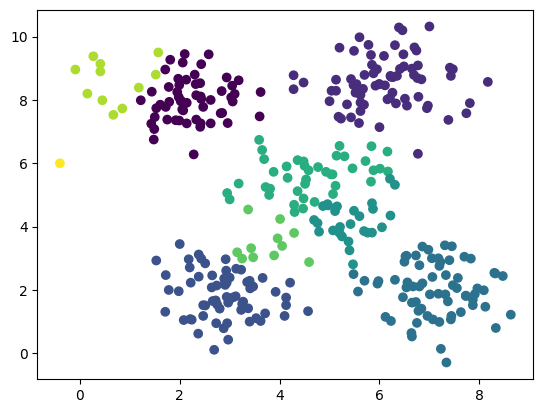

In [ ]:
plt.scatter(data_clustering[:, 0], data_clustering[:, 1], c=clusters)
plt.show()

# 3 Кластеризация AgglomerativeClustering

## 3.1 Теоретическая часть

Метод AgglomerativeClustering - это алгоритм кластеризации, который начинает с того, что каждый объект представляет собой отдельный кластер, а затем объединяет ближайшие кластеры на каждом шаге, пока не останется только один кластер. Этот метод относится к иерархическим методам кластеризации, которые строят дерево кластеров, называемое дендрограммой.

n_clusters: количество кластеров, которые нужно найти. Если не указано, то по умолчанию равно 2.

affinity: метрика расстояния, используемая для вычисления расстояния между кластерами. По умолчанию используется евклидово расстояние, но также можно использовать другие метрики, такие как манхэттенское расстояние или корреляционное расстояние.

linkage: критерий объединения кластеров. По умолчанию используется критерий "ward", который минимизирует дисперсию внутри кластеров при объединении. Также можно использовать другие критерии, такие как "complete" (максимальное расстояние между объектами в кластерах) или "average" (среднее расстояние между объектами в кластерах).

distance_threshold: пороговое значение расстояния, при достижении которого алгоритм останавливается и возвращает текущее количество кластеров. Если не указано, то алгоритм продолжает работу до тех пор, пока не останется только один кластер.

compute_full_tree: флаг, указывающий, нужно ли вычислять полное дерево кластеров или только его часть. Если установлено значение True, то будет вычислено полное дерево кластеров, иначе будет вычислена только его часть, достаточная для получения нужного количества кластеров.

При вычислении полного дерева кластеров алгоритм AgglomerativeClustering последовательно объединяет ближайшие кластеры до тех пор, пока не останется только один кластер. В результате получается дерево кластеров, называемое дендрограммой. Дендрограмма показывает, какие кластеры были объединены на каждом шаге, и какое расстояние было между ними.
Вычисление полного дерева кластеров может быть полезно для визуализации данных и анализа структуры кластеров. Однако, это может быть очень ресурсоемкой операцией, особенно для больших наборов данных. Поэтому, если мы заранее знаем, сколько кластеров мы хотим получить, то можно вычислить только часть дерева кластеров, достаточную для получения нужного количества кластеров. Это может существенно ускорить вычисления и снизить потребление памяти.
Если параметр compute_full_tree установлен в значение False, то алгоритм AgglomerativeClustering будет вычислять только часть дерева кластеров, достаточную для получения нужного количества кластеров. При этом, алгоритм будет останавливаться на том шаге, когда будет достигнуто нужное количество кластеров. Это может быть полезно, если мы заранее знаем, сколько кластеров мы хотим получить, и не хотим тратить ресурсы на вычисление полного дерева кластеров.

memory: объект, используемый для кэширования промежуточных результатов. Если не указано, то кэширование не используется.

## 3.2 Практическая часть

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering111 = AgglomerativeClustering(n_clusters=5, linkage = 'average').fit(data_clustering)

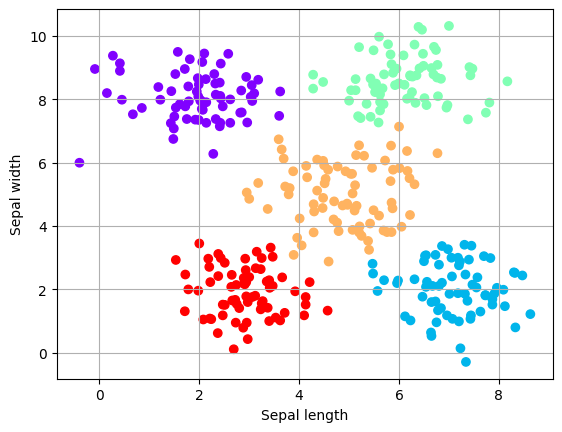

In [ ]:
plt.scatter(data_clustering[:, 0], data_clustering[:, 1], c=clustering111.labels_, cmap='rainbow')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.grid()
plt.show()

# 4 Сравнение качества

Индекс Дэвиса-Болдина (Davies-Bouldin score) - это метрика, используемая для оценки качества кластеризации. Она основана на среднем значении сходства между кластерами и различия между кластерами. Чем меньше значение индекса Дэвиса-Болдина, тем лучше кластеризация.
Для вычисления индекса Дэвиса-Болдина сначала вычисляются средние значения расстояний между центроидами кластеров. Затем для каждого кластера находится ближайший к нему кластер, и вычисляется среднее значение расстояний между центроидами этих кластеров. Индекс Дэвиса-Болдина вычисляется как сумма этих средних значений, деленная на количество кластеров.
Индекс Дэвиса-Болдина может быть использован для выбора оптимального количества кластеров в кластеризации. Он также может быть использован для сравнения различных методов кластеризации и выбора наилучшего метода.

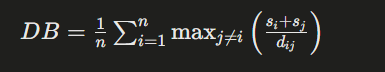

где n - количество кластеров, s_i - среднее расстояние между объектами внутри кластера i, d{ij} - расстояние между центроидами кластеров i и j. Чем меньше значение индекса Дэвиса-Болдина, тем лучше кластеризация.

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
labelsk = kmeans.labels_
labelsk.shape

(350,)

In [ ]:
labelsM = clustering.labels_
labelsM.shape

(350,)

In [ ]:
labelsAgg = clustering111.labels_
labelsAgg.shape

(350,)

In [ ]:
data_quality.shape

(420, 2)

In [ ]:
davies_bouldin_score(data_clustering,labelskr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5512578179872214

In [ ]:
davies_bouldin_score(data_clustering,labelsM)

0.7581529309831512

In [ ]:
davies_bouldin_score(data_clustering,labelsAgg)

0.5625514891521988

# 5 Оценка качества кластеризации с помощью силуэтных оценок

In [ ]:
data_quality

In [ ]:
data_quality

Индекс силуэта (silhouette_score) - это метрика, используемая для оценки качества кластеризации. Она основана на среднем значении сходства между объектами внутри кластера и различия между объектами в разных кластерах. Значение индекса силуэта находится в диапазоне от -1 до 1, где более высокие значения указывают на более точную и качественную кластеризацию.
Чем ближе значение индекса силуэта к 1, тем лучше кластеризация. Значения, близкие к 0, указывают на перекрывающиеся кластеры, а отрицательные значения указывают на то, что объекты были неправильно присвоены кластерам.
Индекс силуэта может быть использован для выбора оптимального количества кластеров в кластеризации. Он также может быть использован для сравнения различных методов кластеризации и выбора наилучшего метода.

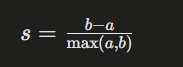

b - Расстояние между  кластерами до близжайшего кластера
a - среднее расстоярия от центра до всех точек

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kmeansq2 = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeansq2.fit(data_quality)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [ ]:
kmeansq3 = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeansq3.fit(data_quality)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
kmeansq4 = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeansq4.fit(data_quality)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [ ]:
kmeansq5 = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeansq5.fit(data_quality)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [ ]:
kmeansq6 = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeansq6.fit(data_quality)

KMeans(n_clusters=6, n_init=10, random_state=0)

In [ ]:
kmeansq7 = KMeans(n_clusters=7, random_state=0, n_init=10)
kmeansq7.fit(data_quality)

KMeans(n_clusters=7, n_init=10, random_state=0)

In [ ]:
kmeansq8 = KMeans(n_clusters=8, random_state=0, n_init=10)
kmeansq8.fit(data_quality)

KMeans(n_init=10, random_state=0)

In [ ]:
kmeansq9 = KMeans(n_clusters=9, random_state=0, n_init=10)
kmeansq9.fit(data_quality)

KMeans(n_clusters=9, n_init=10, random_state=0)

In [ ]:
kmeansq10 = KMeans(n_clusters=10, random_state=0, n_init=10)
kmeansq10.fit(data_quality)

KMeans(n_clusters=10, n_init=10, random_state=0)

In [ ]:
kmeansq11 = KMeans(n_clusters=11, random_state=0, n_init=10)
kmeansq11.fit(data_quality)

KMeans(n_clusters=11, n_init=10, random_state=0)

In [ ]:
kmeansq12 = KMeans(n_clusters=12, random_state=0, n_init=10)
kmeansq12.fit(data_quality)

KMeans(n_clusters=12, n_init=10, random_state=0)

In [ ]:
Params = np.array([2,3,4,5,6,7,8,9,10,11,12])
Params.shape

(11,)

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
Qual = np.array([silhouette_score(data_quality, kmeansq2.labels_), silhouette_score(data_quality, kmeansq3.labels_),
                 silhouette_score(data_quality, kmeansq4.labels_), silhouette_score(data_quality, kmeansq5.labels_),
                 silhouette_score(data_quality, kmeansq6.labels_), silhouette_score(data_quality, kmeansq7.labels_),
                  silhouette_score(data_quality, kmeansq8.labels_), silhouette_score(data_quality, kmeansq9.labels_),
                  silhouette_score(data_quality, kmeansq10.labels_),  silhouette_score(data_quality, kmeansq11.labels_),
                  silhouette_score(data_quality, kmeansq12.labels_)])
Qual

array([0.47762625, 0.54717424, 0.57948019, 0.58900326, 0.60969041,
       0.55776567, 0.49969296, 0.45292479, 0.41087951, 0.37877595,
       0.35775142])

ValueError: ignored

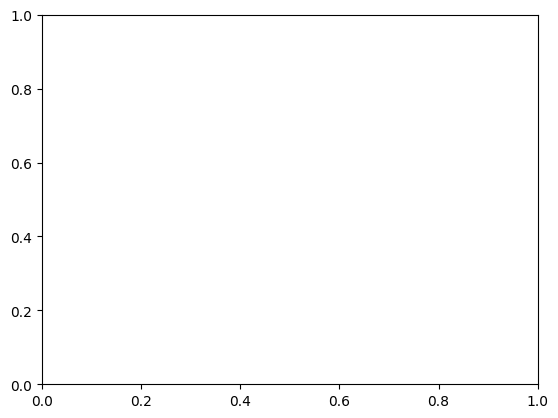

In [ ]:
plt.hist(Params, Qual)
plt.xlabel('Params')
plt.ylabel('Qual')
plt.title('Histogram of Params vs Qual')
plt.xticks(Params)
plt.yticks(Qual)
plt.grid()
plt.show()

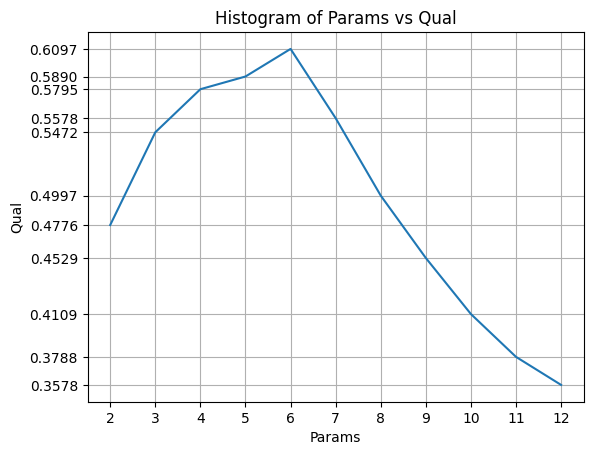

In [ ]:
plt.plot(Params, Qual)
plt.xlabel('Params')
plt.ylabel('Qual')
plt.title('Histogram of Params vs Qual')
plt.xticks(Params)
plt.yticks(Qual)
plt.grid()
plt.show()